# 1. Import Packages and Define Functions

In [12]:
# Import some libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import sys
sys.path.insert(1, '/Users/brianmccabe/DataScience/Flatiron/mod5/Emoji_Analysis/Scripts/')
import config
import warnings
warnings.filterwarnings('ignore')



pd.set_option('display.max_columns', 300)

%matplotlib inline

In [13]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
import string
import scipy
import emoji
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brianmccabe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brianmccabe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brianmccabe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# we can define a function that removes stopwords 
def process_tweet(tweet):
    tweet = str(tweet).lower()
    tokens = nltk.word_tokenize(tweet)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords]
    return stopwords_removed

In [15]:
#set stopwords and punctuations
stopwords = stopwords.words('english')
stopwords += list(string.punctuation)
stopwords += ["n't", "' '", "'re'","”","``","“","''","’","'s","'re","http","https"]

# 2. Load in Data from EDA Notebook

In [22]:
df_all = pd.read_csv("tweets_7_classes.csv")

In [23]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40462 entries, 0 to 40461
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40462 non-null  int64  
 1   tweet            40462 non-null  object 
 2   sentiment_score  40462 non-null  float64
 3   top_emoji        40462 non-null  object 
 4   emoji_frequency  40462 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ MB


In [26]:
df_all.head()

,Unnamed: 0,tweet,sentiment_score,top_emoji,emoji_frequency
0,0,Hello this has been KARINA and WINTER We re cu...,0.9840,😊,3230
1,1,ilysm you deserve the world please you re awes...,0.7284,😍,7192
2,4,Hey 965TDY I d like to hear Naughty List by li...,0.9168,😊,3230
3,6,If I were to lift her up I d die SingleAndMing...,0.9723,😂,13949
4,7,Mr Blair don t be a lier a Blier R G Mugabe RI...,0.4404,😂,13949


In [27]:
emojis.head()

,top_emoji,sentiment_score,emoji_frequency
0,😂,0.565041,13949
1,😊,0.682589,3230
2,😍,0.560589,7192
3,😡,-0.187926,1155
4,😭,-0.509100,8719


3. 

# 3. KMeans Clustering

### Lemmatize

In [29]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()

In [30]:
#apply above function to data

processed_tweets = list(map(process_tweet, df_all.tweet))

In [31]:
#create list with lemmatized output
lemmatized_output = []

for tweet in processed_tweets:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in tweet])
    lemmatized_output.append(lemmed)

In [32]:
#change this to 'lemmatized_output' if you are including lemma (see above)
X_lem = lemmatized_output

In [33]:
tfidf = TfidfVectorizer(ngram_range=(1,1))

tfidf_data_train_lem = tfidf.fit_transform(X_lem)


tfidf_data_train_lem = pd.DataFrame(tfidf_data_train_lem.toarray(), columns=tfidf.vocabulary_.keys())



In [34]:
train_columns = tfidf_data_train_lem.columns
    
tfidf_data_train_lem = scipy.sparse.csr_matrix(tfidf_data_train_lem)

In [35]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

In [36]:
from sklearn.cluster import KMeans

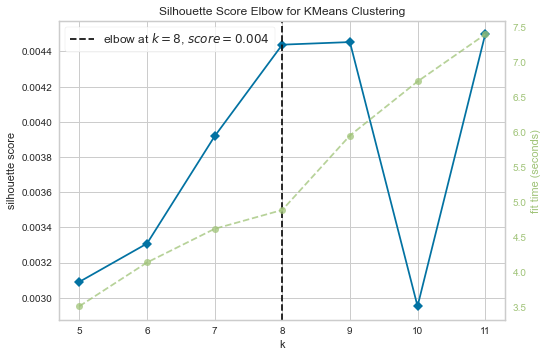

In [37]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,12), metric='silhouette')

visualizer.fit(tfidf_data_train_lem)        # Fit the data to the visualizer
visualizer.show()

In [60]:
from sklearn.cluster import KMeans

In [61]:
kmeans = KMeans(n_clusters=8)

In [64]:
kmeans.fit(tfidf_data_train_lem)

KMeans()

In [67]:
predicted_clusters = kmeans.predict(tfidf_data_train_lem)

In [74]:
df_all['labels'] = predicted_clusters

### First

In [85]:
df_all[df_all.labels == 0].sentiment_score.describe()

count    18190.000000
mean         0.182775
std          0.608620
min         -0.999600
25%         -0.418125
50%          0.383300
75%          0.726900
max          0.999700
Name: sentiment_score, dtype: float64

In [86]:
df_all[df_all.labels == 0].top_emoji.value_counts()

😂    7027
😭    4318
😍    2666
🤔    1828
😊    1377
😡     533
😱     441
Name: top_emoji, dtype: int64

In [112]:
for tweet in df_all[df_all.labels == 0].tweet[:1000:100]:
    print(tweet)
    print('-')

A migrant from Tunisia he d only been in France a few weeks Radio 4 news Enough said
-
177 slides Ok ctrl f do ur thing for tom WHAHAHAHA
-
1kaylaaaa My lol brothers got there s on y all tripping it s bitting our
-
91_bion They even mocked pope bible torah church but whole world is bullying muslims
-
Actionjerk Me when I see an EPIC reddit repost
-
AhlajiOmo Help me g
-
alextimoney K YOUR SO PRETTY FOR WHAT
-
amauri_daniels bruh y all had a good run Issa wrap now lol
-
angeld_20 4 weeks chill
-
Apple_Dip She cuts up
-


### Second

In [87]:
df_all[df_all.labels == 1].sentiment_score.describe()

count    1414.000000
mean        0.662801
std         0.438552
min        -0.995100
25%         0.636900
50%         0.824450
75%         0.921700
max         0.997000
Name: sentiment_score, dtype: float64

In [88]:
df_all[df_all.labels == 1].top_emoji.value_counts()

😍    664
😂    304
😭    236
😊    129
🤔     46
😱     21
😡     14
Name: top_emoji, dtype: int64

In [110]:
for tweet in df_all[df_all.labels == 1].tweet[:1000:100]:
    print(tweet)
    print('-')

his next movie will deal with love in more explicit terms and specifically gay love https t co rDfZAZ3XXB
-
buffles25 AWW thank you so much for drawing my girl she looks so cute and I love how you included her twin https t co ydMD9bp0Nx
-
Gregfromtheglo Lmaooooooo I love how passionately you responded I get it I m just yanking your chain
-
LesleiStan No you don t you love meeee https t co Z9RKv5Af41
-
phoetatas love u all
-
tomisaidwhat I acc love you mannn I ve been tryna gain weight so thought I d share
-
Baby take my hand I want you to be my husband Cause you re my ironman and i love you 3000
-
i didn t like jane so she can leave i love kuzco https t co PirxcLd6Gb
-
I love this Black women in esports Take my money yesterday HeatherEliece she plays Sims too https t co c3z8RdX2YZ
-
Love how kai look so natural here https t co MSOcbc7zlo
-


### Third

In [89]:
df_all[df_all.labels == 2].sentiment_score.describe()

count    8304.000000
mean        0.237197
std         0.608210
min        -0.999700
25%        -0.300150
50%         0.440400
75%         0.784275
max         0.999500
Name: sentiment_score, dtype: float64

In [91]:
df_all[df_all.labels == 2].top_emoji.value_counts()

😂    2837
😍    1570
😭    1545
🤔     850
😊     787
😱     471
😡     244
Name: top_emoji, dtype: int64

In [113]:
for tweet in df_all[df_all.labels == 2].tweet[:1000:100]:
    print(tweet)
    print('-')

Hello this has been KARINA and WINTER We re currently looking for our dearest member t https t co w9NXwy7G8b
-
terraformingmars boardgames bestgame And Enris was again kingofmars https t co 8BiI6JMb5y
-
3 I m not eatin snail cottage cheese or yogurt https t co u3aTqWd30g
-
alittlelotus That ain t what I asked lmao but anyways if it was his music you liked him for then you probably s https t co nDQ7sAN8ij
-
babyname_maven AliyyaSwaby According to a friend of mine who teaches Totally valid analysis And guess wh https t co iXqTHY2dg9
-
BronkielHollow2 It ain t yo fault B This year been hell and this month been scressful I only got him a costume https t co Q0N7pRTroW
-
CMONDOMINIQUE Aww bless him My bf does the same He just comes over and immediately starts cleaning the best he https t co ChzHWaMx5q
-
dhruv_rathee Don t worry It s these kind of people who r doing it https t co T5lZpeVCG3
-
eternallove0613 So relateable that was during my first month before i got into ships i saw ytvideos t

### Fourth

In [93]:
df_all[df_all.labels == 3].sentiment_score.describe()

count    655.000000
mean       0.175850
std        0.604894
min       -0.979100
25%       -0.382650
50%        0.354200
75%        0.739050
max        0.996700
Name: sentiment_score, dtype: float64

In [94]:
df_all[df_all.labels == 3].top_emoji.value_counts()

😂    252
😭    146
😍     94
🤔     71
😊     40
😡     27
😱     25
Name: top_emoji, dtype: int64

### Fifth

In [95]:
df_all[df_all.labels == 4].sentiment_score.describe()

count    6851.000000
mean        0.219268
std         0.617071
min        -0.999000
25%        -0.340000
50%         0.440400
75%         0.784500
max         0.999800
Name: sentiment_score, dtype: float64

In [96]:
df_all[df_all.labels == 4].top_emoji.value_counts()

😂    1961
😍    1577
😭    1412
😊     584
🤔     577
😱     513
😡     227
Name: top_emoji, dtype: int64

### Sixth

In [97]:
df_all[df_all.labels == 5].sentiment_score.describe()

count    2457.000000
mean        0.303597
std         0.609082
min        -0.997400
25%        -0.178800
50%         0.571900
75%         0.817600
max         0.996400
Name: sentiment_score, dtype: float64

In [98]:
df_all[df_all.labels == 5].top_emoji.value_counts()

😂    1022
😭     646
😍     288
🤔     216
😊     163
😱      71
😡      51
Name: top_emoji, dtype: int64

### Seventh

In [99]:
df_all[df_all.labels == 6].sentiment_score.describe()

count    1508.000000
mean        0.054111
std         0.597470
min        -0.996500
25%        -0.541100
50%         0.000000
75%         0.636000
max         0.999600
Name: sentiment_score, dtype: float64

In [100]:
df_all[df_all.labels == 6].top_emoji.value_counts()

😱    904
😂    200
😍    164
😭     93
😊     78
🤔     57
😡     12
Name: top_emoji, dtype: int64

### Eighth

In [101]:
df_all[df_all.labels == 7].sentiment_score.describe()

count    1083.000000
mean        0.088629
std         0.625307
min        -0.995000
25%        -0.476700
50%         0.128000
75%         0.680800
max         0.995900
Name: sentiment_score, dtype: float64

In [102]:
df_all[df_all.labels == 7].top_emoji.value_counts()

😂    346
😭    323
😍    169
🤔     95
😊     72
😡     47
😱     31
Name: top_emoji, dtype: int64